<a href="https://colab.research.google.com/github/gayatrichopade11/construction_cost_estimation/blob/main/Hyperliquid_Trader_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()


Mounted at /content/drive


Saving historical_data.csv to historical_data.csv


In [30]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("historical_data.csv")
df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [31]:
df.shape


(211224, 16)

In [6]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [32]:
df.columns



Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [38]:
df[['Timestamp']].head()


,Timestamp
0,2024-10-27 03:33:20
1,2024-10-27 03:33:20
2,2024-10-27 03:33:20
3,2024-10-27 03:33:20
4,2024-10-27 03:33:20


In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [41]:
#data cleaning
df.isnull().sum()


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [42]:
#Total Trades(Assignment)
total_trades = len(df)
total_trades

211224

In [44]:
#Total Profit / Loss
total_pnl = df['Closed PnL'].sum()
total_pnl

np.float64(10296958.943436)

In [45]:
#Average Profit per Trade
avg_pnl = df['Closed PnL'].mean()
avg_pnl


np.float64(48.74900079269401)

In [46]:
#Buy vs Sell Behavior
df['Side'].value_counts()

,count
Side,
SELL,108528
BUY,102696


In [47]:
#Coin-wise Trader Performance
coin_pnl = df.groupby('Coin')['Closed PnL'].sum().sort_values(ascending=False)
coin_pnl


,Closed PnL
Coin,
@107,2.783913e+06
HYPE,1.948485e+06
SOL,1.639556e+06
ETH,1.319979e+06
BTC,8.680447e+05
...,...
PAXG,-1.868887e+04
IO,-2.189391e+04
ADA,-2.811346e+04


In [48]:
#Trade Size vs Profit
df[['Size USD', 'Closed PnL']].corr()

,Size USD,Closed PnL
Size USD,1.000000,0.123589
Closed PnL,0.123589,1.000000


In [49]:
#Fees Impact Analysis

df[['Fee', 'Closed PnL']].corr()



,Fee,Closed PnL
Fee,1.00000,0.08402
Closed PnL,0.08402,1.00000


In [50]:
#Time-based Analysis (VERY IMPORTANT)
df['date'] = df['Timestamp'].dt.date

daily_pnl = df.groupby('date')['Closed PnL'].sum()
daily_pnl.head()

,Closed PnL
date,
2023-03-28,0.000000e+00
2023-11-14,1.555034e+02
2024-03-09,1.769655e+05
2024-07-03,1.587424e+05
2024-10-27,3.189461e+06


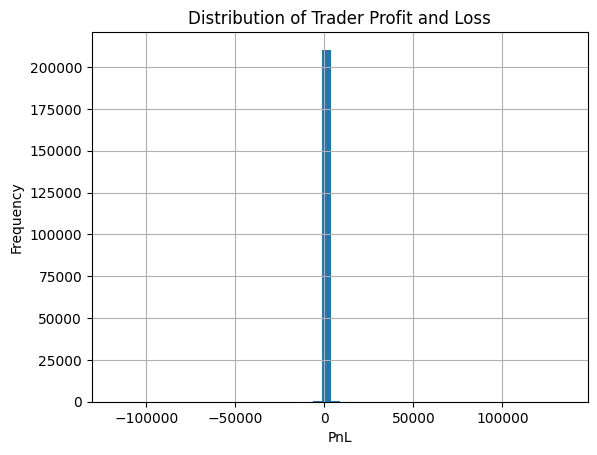

In [52]:
#Visualizations
#Profit/Loss Distribution

plt.figure()
df['Closed PnL'].hist(bins=50)
plt.title("Distribution of Trader Profit and Loss")
plt.xlabel("PnL")
plt.ylabel("Frequency")
plt.show()


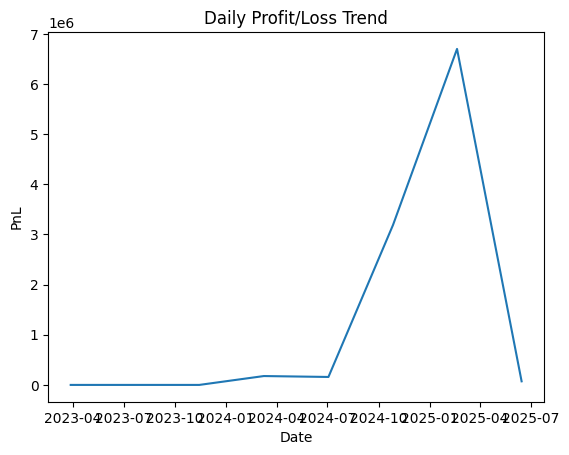

In [53]:
#Daily PnL Trend
plt.figure()
daily_pnl.plot()
plt.title("Daily Profit/Loss Trend")
plt.xlabel("Date")
plt.ylabel("PnL")
plt.show()